In [24]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('red-wine.csv')

In [25]:
dftrain = red_wine.sample(frac=0.7,random_state=0)
dfvalid = red_wine.drop(dftrain.index)

In [26]:
display(dftrain.head(4))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [27]:
max_ = dftrain.max(axis=0)
min_ = dftrain.min(axis=0)
dftrain = (dftrain - min_) / (max_ - min_)
dfvalid = (dfvalid - min_) / (max_ - min_)

xtrain = dftrain.drop('quality',axis=1)
xvalid = dfvalid.drop('quality',axis=1)
ytrain = dftrain['quality']
yvalid = dfvalid['quality']

In [28]:
print(xtrain.shape)

(1119, 11)


In [29]:
from tensorflow import keras 
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(521,activation='relu',input_shape=[11]),
    layers.Dense(521,activation='relu'),
    layers.Dense(521,activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mae',
)

c:\Users\Raktim\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
history = model.fit(
    xtrain,ytrain,
    validation_data=(xvalid,yvalid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.2760 - val_loss: 0.1353
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1452 - val_loss: 0.1282
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1286 - val_loss: 0.1199
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1194 - val_loss: 0.1158
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1139 - val_loss: 0.1091
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1097 - val_loss: 0.1054
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1061 - val_loss: 0.1101
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1061 - val_loss: 0.1022
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1030 - val_loss: 0.1152
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1054 - val_loss: 0.1047


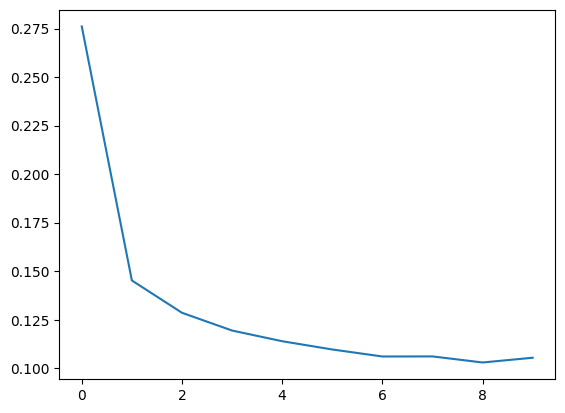

In [31]:
import pandas as pd 
historydf = pd.DataFrame(history.history)
historydf['loss'].plot();